# Import Dataset

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./ACME-HappinessSurvey2020.csv")

# Exploratory Data Analysis

In [3]:
df.shape

(126, 7)

In [4]:
df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [7]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that there is no missing values as all columns have 126 data.</br>
<br>As well, the data is all numeric so it is not required data wrangling and preprocessing.

### Analyze the data by each column.

#### X1 - my order was delivered on time

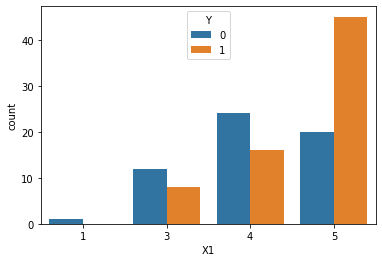

In [8]:
sns.countplot(data=df, x="X1", hue="Y")

In [9]:
pd.pivot_table(df, index="X1", values="Y")

,Y
X1,
1,0.000000
3,0.400000
4,0.400000
5,0.692308


When the order was delivered on time, the customers get happier.

#### X2 - contents of my order was as I expected

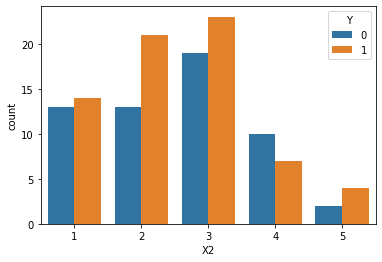

In [10]:
sns.countplot(data=df, x="X2", hue="Y")

In [11]:
pd.pivot_table(df, index="X2", values="Y")

,Y
X2,
1,0.518519
2,0.617647
3,0.547619
4,0.411765
5,0.666667


The contents of my order seem rarely affecting to the customer's happiness.

#### X3; I ordered everything I wanted to order

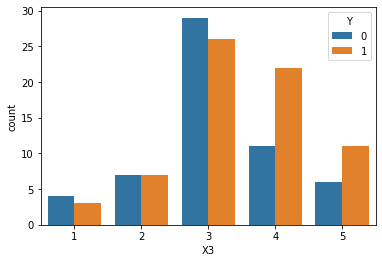

In [12]:
sns.countplot(data=df, x="X3", hue="Y")

In [13]:
pd.pivot_table(df, index="X3", values="Y")

,Y
X3,
1,0.428571
2,0.500000
3,0.472727
4,0.666667
5,0.647059


It seems less affecting to the customer's happiness whether I ordered everything I wanted to order or not.

#### X4; I paid a good price for my order

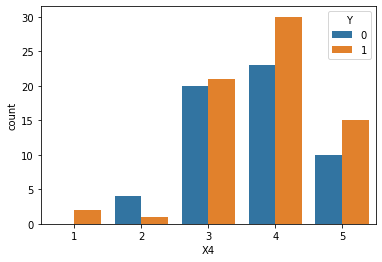

In [14]:
sns.countplot(data=df, x="X4", hue="Y")

In [15]:
pd.pivot_table(df, index="X4", values="Y")

,Y
X4,
1,1.000000
2,0.200000
3,0.512195
4,0.566038
5,0.600000


It seems the customers are happy when the price is reasonable.

#### X5; I am satisfied with my courier

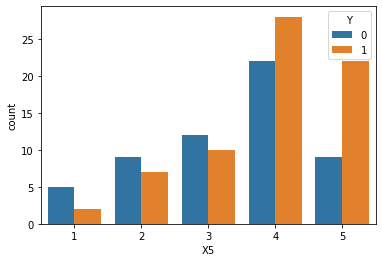

In [16]:
sns.countplot(data=df, x="X5", hue="Y")

In [17]:
pd.pivot_table(df, index="X5", values="Y")

,Y
X5,
1,0.285714
2,0.437500
3,0.454545
4,0.560000
5,0.709677


When the order is delivered in a good condition, the customer is happy.

#### X6; The app makes ordering easy for me

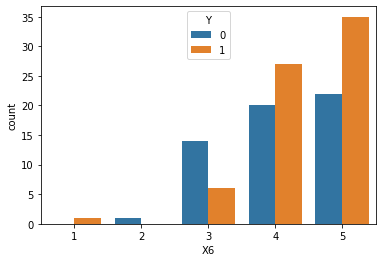

In [18]:
sns.countplot(data=df, x="X6", hue="Y")

In [19]:
pd.pivot_table(df, index="X6", values="Y")

,Y
X6,
1,1.000000
2,0.000000
3,0.300000
4,0.574468
5,0.614035


If the app is easy to use for customers, they are much happy.

### Feature selection

As we saw that the columns X1, X4, X5, and X6 have a positive correlation with Y, I will select them as a feature.

In [20]:
feature = ["X1", "X4", "X5", "X6"]
X = df[feature]
y = df["Y"]

### Split the data into train and test

Split train and test to 80/20

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test with 20% for test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 4), (100,), (26, 4), (26,))

# Modeling

In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

# import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
from sklearn.metrics import r2_score

## 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred_LR = model_LR.predict(X_test)

#### Evaluation

In [27]:
model_score_LR = model_LR.score(X_train, y_train)

In [28]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.52      0.92      0.67        13

    accuracy                           0.54        26
   macro avg       0.59      0.54      0.46        26
weighted avg       0.59      0.54      0.46        26



### Improve the Model

In [29]:
model_iLR = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model_iLR.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [30]:
y_pred_iLR = model_iLR.predict(X_test)

#### Evaluation

In [31]:
model_score_iLR = model_iLR.score(X_train, y_train)

In [32]:
print(classification_report(y_test, y_pred_iLR))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



## 2. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_DT = DecisionTreeClassifier(max_depth=8, random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [35]:
y_pred_DT = model_DT.predict(X_test)

#### Evaluation

In [36]:
model_score_DT = model_DT.score(X_train, y_train)

In [37]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.47      0.69      0.56        13

    accuracy                           0.46        26
   macro avg       0.45      0.46      0.43        26
weighted avg       0.45      0.46      0.43        26



## 3. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=36, n_jobs=-1)
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=50, n_jobs=-1, random_state=36)

In [40]:
y_pred_RF = model_RF.predict(X_test)

#### Evaluation

In [41]:
model_score_RF = model_RF.score(X_train, y_train)

In [42]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.63      0.92      0.75        13

    accuracy                           0.69        26
   macro avg       0.74      0.69      0.67        26
weighted avg       0.74      0.69      0.67        26



## 4. K-Nearest Neighbor

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred_KNN = model_KNN.predict(X_test)

#### Evaluation

In [46]:
model_score_KNN = model_KNN.score(X_train, y_train)

In [47]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.33      0.15      0.21        13
           1       0.45      0.69      0.55        13

    accuracy                           0.42        26
   macro avg       0.39      0.42      0.38        26
weighted avg       0.39      0.42      0.38        26



## 5. Support Vector Machines (SVM)

In [48]:
from sklearn.svm import SVC

In [49]:
model_SVC = SVC(kernel='rbf', gamma='auto')
model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

In [50]:
y_pred_SVC = model_SVC.predict(X_test)

#### Evaluation

In [51]:
model_score_SVC = model_SVC.score(X_train, y_train)

In [52]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.52      1.00      0.68        13

    accuracy                           0.54        26
   macro avg       0.76      0.54      0.41        26
weighted avg       0.76      0.54      0.41        26



## 6. Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_GNB = model_GNB.predict(X_test)

#### Evaluation

In [56]:
model_score_GNB = model_GNB.score(X_train, y_train)

In [57]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.54      1.00      0.70        13

    accuracy                           0.58        26
   macro avg       0.77      0.58      0.48        26
weighted avg       0.77      0.58      0.48        26



# Comparison of Model Performance

In [58]:
print("Logistic Regression:\t\t%.5f" %model_score_LR)
print("Logistic Regression improved:   %.5f" %model_score_iLR)
print("Decision Tree:\t\t\t%.5f" %model_score_DT)
print("Random Forest:\t\t\t%.5f" %model_score_RF)
print("K-Nearest Neighbor:\t\t%.5f" %model_score_KNN)
print("SVM:\t\t\t\t%.5f" %model_score_SVC)
print("Naive Bayes:\t\t\t%.5f" %model_score_GNB)

Logistic Regression:		0.59000
Logistic Regression improved:   0.59000
Decision Tree:			0.79000
Random Forest:			0.81000
K-Nearest Neighbor:		0.73000
SVM:				0.69000
Naive Bayes:			0.63000


# Model Evaluation

In [59]:
print("R-squared of Logistic Regression:\t   %.5f" %r2_score(y_test, y_pred_LR))
print("R-squared of Logistic Regression improved: %.5f" %r2_score(y_test, y_pred_iLR))
print("R-squared of Decision Tree:\t\t   %.5f" %r2_score(y_test, y_pred_DT))
print("R-squared of Random Forest:\t\t   %.5f" %r2_score(y_test, y_pred_RF))
print("R-squared of K-Nearest Neighbor:\t   %.5f" %r2_score(y_test, y_pred_KNN))
print("R-squared of SVM:\t\t\t   %.5f" %r2_score(y_test, y_pred_SVC))
print("R-squared of Naive Bayes:\t\t   %.5f" %r2_score(y_test, y_pred_GNB))

R-squared of Logistic Regression:	   -0.84615
R-squared of Logistic Regression improved: -0.69231
R-squared of Decision Tree:		   -1.15385
R-squared of Random Forest:		   -0.23077
R-squared of K-Nearest Neighbor:	   -1.30769
R-squared of SVM:			   -0.84615
R-squared of Naive Bayes:		   -0.69231


# Conclusion

Random Forest model shows the best performance with 81% of accuracy.

# Additional analysis with different feature

### Feature selection

I will select all the columns as a feature for a comparison.

In [60]:
feature = ["X1", "X2", "X3", "X4", "X5", "X6"]
X = df[feature]
y = df["Y"]

### Split the data into train and test

Split train and test to 80/20

In [61]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test with 20% for test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [62]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 6), (100,), (26, 6), (26,))

# Modeling

In [63]:
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

# import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
from sklearn.metrics import r2_score

## 1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_pred_LR = model_LR.predict(X_test)

#### Evaluation

In [67]:
model_score_LR = model_LR.score(X_train, y_train)

In [68]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



### Improve the Model

In [69]:
model_iLR = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model_iLR.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [70]:
y_pred_iLR = model_iLR.predict(X_test)

#### Evaluation

In [71]:
model_score_iLR = model_iLR.score(X_train, y_train)

In [72]:
print(classification_report(y_test, y_pred_iLR))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



## 2. Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model_DT = DecisionTreeClassifier(max_depth=8, random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [75]:
y_pred_DT = model_DT.predict(X_test)

#### Evaluation

In [76]:
model_score_DT = model_DT.score(X_train, y_train)

In [77]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.60      0.69      0.64        13

    accuracy                           0.62        26
   macro avg       0.62      0.62      0.61        26
weighted avg       0.62      0.62      0.61        26



## 3. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=36, n_jobs=-1)
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=50, n_jobs=-1, random_state=36)

In [80]:
y_pred_RF = model_RF.predict(X_test)

#### Evaluation

In [81]:
model_score_RF = model_RF.score(X_train, y_train)

In [82]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.62      0.77      0.69        13

    accuracy                           0.65        26
   macro avg       0.66      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



## 4. K-Nearest Neighbor

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
model_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
y_pred_KNN = model_KNN.predict(X_test)

#### Evaluation

In [86]:
model_score_KNN = model_KNN.score(X_train, y_train)

In [87]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.52      0.85      0.65        13

    accuracy                           0.54        26
   macro avg       0.56      0.54      0.49        26
weighted avg       0.56      0.54      0.49        26



## 5. Support Vector Machines (SVM)

In [88]:
from sklearn.svm import SVC

In [89]:
model_SVC = SVC(kernel='rbf', gamma='auto')
model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

In [90]:
y_pred_SVC = model_SVC.predict(X_test)

#### Evaluation

In [91]:
model_score_SVC = model_SVC.score(X_train, y_train)

In [92]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.57      1.00      0.72        13

    accuracy                           0.62        26
   macro avg       0.78      0.62      0.55        26
weighted avg       0.78      0.62      0.55        26



## 6. Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB()

In [95]:
y_pred_GNB = model_GNB.predict(X_test)

#### Evaluation

In [96]:
model_score_GNB = model_GNB.score(X_train, y_train)

In [97]:
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.55      0.92      0.69        13

    accuracy                           0.58        26
   macro avg       0.65      0.58      0.52        26
weighted avg       0.65      0.58      0.52        26



# Comparison of Model Performance

In [98]:
print("Logistic Regression:\t\t%.5f" %model_score_LR)
print("Logistic Regression improved:   %.5f" %model_score_iLR)
print("Decision Tree:\t\t\t%.5f" %model_score_DT)
print("Random Forest:\t\t\t%.5f" %model_score_RF)
print("K-Nearest Neighbor:\t\t%.5f" %model_score_KNN)
print("SVM:\t\t\t\t%.5f" %model_score_SVC)
print("Naive Bayes:\t\t\t%.5f" %model_score_GNB)

Logistic Regression:		0.56000
Logistic Regression improved:   0.58000
Decision Tree:			0.87000
Random Forest:			0.96000
K-Nearest Neighbor:		0.72000
SVM:				0.77000
Naive Bayes:			0.61000


# Model Evaluation

In [99]:
print("R-squared of Logistic Regression:\t   %.5f" %r2_score(y_test, y_pred_LR))
print("R-squared of Logistic Regression improved: %.5f" %r2_score(y_test, y_pred_iLR))
print("R-squared of Decision Tree:\t\t   %.5f" %r2_score(y_test, y_pred_DT))
print("R-squared of Random Forest:\t\t   %.5f" %r2_score(y_test, y_pred_RF))
print("R-squared of K-Nearest Neighbor:\t   %.5f" %r2_score(y_test, y_pred_KNN))
print("R-squared of SVM:\t\t\t   %.5f" %r2_score(y_test, y_pred_SVC))
print("R-squared of Naive Bayes:\t\t   %.5f" %r2_score(y_test, y_pred_GNB))

R-squared of Logistic Regression:	   -0.69231
R-squared of Logistic Regression improved: -0.69231
R-squared of Decision Tree:		   -0.53846
R-squared of Random Forest:		   -0.38462
R-squared of K-Nearest Neighbor:	   -0.84615
R-squared of SVM:			   -0.53846
R-squared of Naive Bayes:		   -0.69231


# Conclusion

Random Forest model still shows the best performance, but the difference is that the accuracy has been increased to <B>96%</B> from 81%, while R-squared value has been worse to <B>-0.38462</B> from -0.23077, which means the correlation has been increased in negative way.